<a href="https://colab.research.google.com/github/Navin7899/CNN-RiceLeaf-disease-detection/blob/main/Image_classification_on_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
labels = ['bacterial leaf blight','brown spot','leaf smut']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/drive/MyDrive/internship/data2/train')
val = get_data('/content/drive/MyDrive/internship/data2/test')

<ipython-input-3-45d0360cff9e>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
#history = model.fit(x_train,y_train,epochs = 300 , validation_data = (x_val, y_val))


from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=200,
          validation_data=(x_val, y_val), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_loss improved from inf to 1.09676, saving model to model.weights.best.hdf5
4/4 - 11s - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0968 - val_accuracy: 0.2857 - 11s/epoch - 3s/step
Epoch 2/200

Epoch 2: val_loss improved from 1.09676 to 1.09530, saving model to model.weights.best.hdf5
4/4 - 0s - loss: 1.1034 - accuracy: 0.3143 - val_loss: 1.0953 - val_accuracy: 0.2857 - 477ms/epoch - 119ms/step
Epoch 3/200

Epoch 3: val_loss improved from 1.09530 to 1.09427, saving model to model.weights.best.hdf5
4/4 - 0s - loss: 1.1027 - accuracy: 0.3238 - val_loss: 1.0943 - val_accuracy: 0.2857 - 481ms/epoch - 120ms/step
Epoch 4/200

Epoch 4: val_loss improved from 1.09427 to 1.09338, saving model to model.weights.best.hdf5
4/4 - 0s - loss: 1.0997 - accuracy: 0.3238 - val_loss: 1.0934 - val_accuracy: 0.2857 - 465ms/epoch - 116ms/step
Epoch 5/200

Epoch 5: val_loss improved from 1.09338 to 1.09256, saving model to model.weights.best.hdf5
4/4 - 0s - loss: 1.0974 - accuracy: 0.3238 - va

In [ ]:
# evaluate test accuracy
score = model.evaluate(x_val, y_val, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 64.2857%


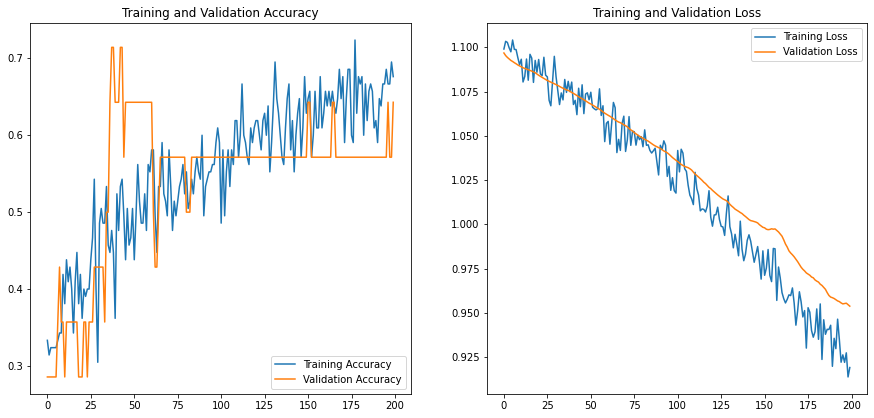

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
len(x_train)

105

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:
# get predictions on the test set
y_hat = model.predict(x_val)

labels = ['bacterial leaf blight','brown spot','leaf smut']

1/1 [==============================] - 0s 115ms/step


In [ ]:
X_new = x_val
y_new = y_val
y_proba = model.predict(X_new)
y_proba
y_proba.round(2)

1/1 [==============================] - 0s 33ms/step


array([[0.31, 0.26, 0.43],
       [0.36, 0.29, 0.36],
       [0.51, 0.28, 0.2 ],
       [0.31, 0.26, 0.42],
       [0.41, 0.3 , 0.3 ],
       [0.36, 0.28, 0.37],
       [0.3 , 0.42, 0.28],
       [0.17, 0.49, 0.33],
       [0.18, 0.49, 0.33],
       [0.15, 0.36, 0.49],
       [0.44, 0.3 , 0.26],
       [0.36, 0.27, 0.37],
       [0.22, 0.22, 0.55],
       [0.33, 0.25, 0.42]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
img = tf.keras.utils.load_img("/content/drive/MyDrive/internship/data2/train/leaf smut/DSC_0293.JPG", target_size=(224,224,3)
)
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions
score1=np.argmax(score, axis=-1)
score1

1/1 [==============================] - 0s 123ms/step


array([0])

In [ ]:
Rice_labels = ['brown spot','bacterial leaf blight','leaf smut']

In [ ]:
fig = plt.figure(figsize=(40, 20))
for i, idx in enumerate(np.random.choice(x_val.shape[0], size=32)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_val[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_val[idx])
    ax.set_title("{}({})".format(Rice_labels[pred_idx],Rice_labels[true_idx]),color=("blue" if pred_idx == true_idx else "red"))

SyntaxError: ignored